## Multi-label Legal Text Classification for CIA

### *Document layout detection*
https://towardsdatascience.com/analyzing-document-layout-with-layoutparser-ed24d85f1d44

In [1]:
!pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
!pip install pdf2image
!pip install "layoutparser[ocr]"


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /private/var/folders/rd/n9w0gpv53y72x5k9wk3hp63w0000gn/T/pip-install-k883h4gh/detectron2_3cba5d576b0742d1ac1bc39945fd30f5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /private/var/folders/rd/n9w0gpv53y72x5k9wk3hp63w0000gn/T/pip-install-k883h4gh/detectron2_3cba5d576b0742d1ac1bc39945fd30f5
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
  Resolved https://github.com/facebookresearch/detectron2.git to commit 82a57ce0b70057685962b352535147d9a8118578
  Preparing metadata (setup.py) ... done

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice

In [2]:
import pdf2image
from pdf2image import convert_from_bytes, convert_from_path
import numpy as np
import pandas as pd
import os
from glob import glob
import layoutparser as lp

In [17]:
os.getcwd()

'/Users/janinedevera/Documents/School/MDS 2021-2023/Thesis/multilabel-legal-text-classification-CIA'

In [3]:
os.chdir("../..")
os.getcwd()

'/Users/janinedevera/Documents/School/MDS 2021-2023/Thesis/multilabel-legal-text-classification-CIA'

Create list of paths for PDFs

In [4]:
dir = "data/legislation/Philippines/"
pdf_list = glob(os.path.join(dir, "*.pdf"))
len(pdf_list)

20

Read all PDF files as images, convert image to arrays and save in a list. 

In [5]:
img_list = []
for pdf in pdf_list:
    # convert pdf to image
    file = convert_from_path(pdf)
    # read image as array
    for (i, page) in enumerate(file):
        img = np.asarray(file[i])
    # append to list 
        img_list.append(img)
    print('{} is done'.format(pdf) + ': ' + str(len(file)) + ' pages')

data/legislation/Philippines/PH_RA 9337 Amendments to Internal Revenue Code 2005.pdf is done: 52 pages
data/legislation/Philippines/PH_RA 7354 Postal Service Act 1992.pdf is done: 15 pages
data/legislation/Philippines/PH_EO 292 Administrative Code 1987.pdf is done: 345 pages
data/legislation/Philippines/PH_RA 7160 Local Government Code 1991.pdf is done: 325 pages
data/legislation/Philippines/PH_RA 11232 Revised Corporation Code 2019.pdf is done: 73 pages
data/legislation/Philippines/PH_CA 146 Public Service Act 1936.pdf is done: 15 pages
data/legislation/Philippines/PH_RA 4136 Land Transportation Act 1964.pdf is done: 44 pages
data/legislation/Philippines/PH_EO 24 2011.pdf is done: 13 pages
data/legislation/Philippines/PH_RA 9184 Government Procurement Act IRR 2016.pdf is done: 149 pages
data/legislation/Philippines/PH_EO 203.pdf is done: 6 pages
data/legislation/Philippines/PH_RA 11032 EODB 2017.pdf is done: 13 pages
data/legislation/Philippines/PH_EO 80 2012.pdf is done: 8 pages
data

In [6]:
len(img_list)

1217

Document layout recognition \
https://layout-parser.readthedocs.io/en/latest/notes/modelzoo.html#model-catalog

In [7]:
# model used for DLA
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.45], # if confidence score < 0.5, bounding box will not appear 
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

/Users/janinedevera/opt/miniconda3/envs/watermelon/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [8]:
layout_results = []
for img in img_list:
    layout = model.detect(img)
    layout_results.append(layout)

/Users/janinedevera/opt/miniconda3/envs/watermelon/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
len(layout_results)

1217

In [10]:
layout_results[300]

Layout(_blocks=[TextBlock(block=Rectangle(x_1=500.1138610839844, y_1=964.337158203125, x_2=1196.3856201171875, y_2=1006.3848876953125), text=None, id=None, type=Title, parent=None, next=None, score=0.9558045268058777), TextBlock(block=Rectangle(x_1=156.34080505371094, y_1=1134.5460205078125, x_2=1460.943115234375, y_2=1593.7265625), text=None, id=None, type=Text, parent=None, next=None, score=0.891417920589447), TextBlock(block=Rectangle(x_1=162.53701782226562, y_1=1942.6693115234375, x_2=1499.8321533203125, y_2=1984.7415771484375), text=None, id=None, type=Text, parent=None, next=None, score=0.8729866147041321), TextBlock(block=Rectangle(x_1=119.90322875976562, y_1=138.6204071044922, x_2=1549.8802490234375, y_2=759.0147094726562), text=None, id=None, type=Text, parent=None, next=None, score=0.859498143196106), TextBlock(block=Rectangle(x_1=585.4419555664062, y_1=1052.084716796875, x_2=1104.9912109375, y_2=1094.9461669921875), text=None, id=None, type=Text, parent=None, next=None, scor

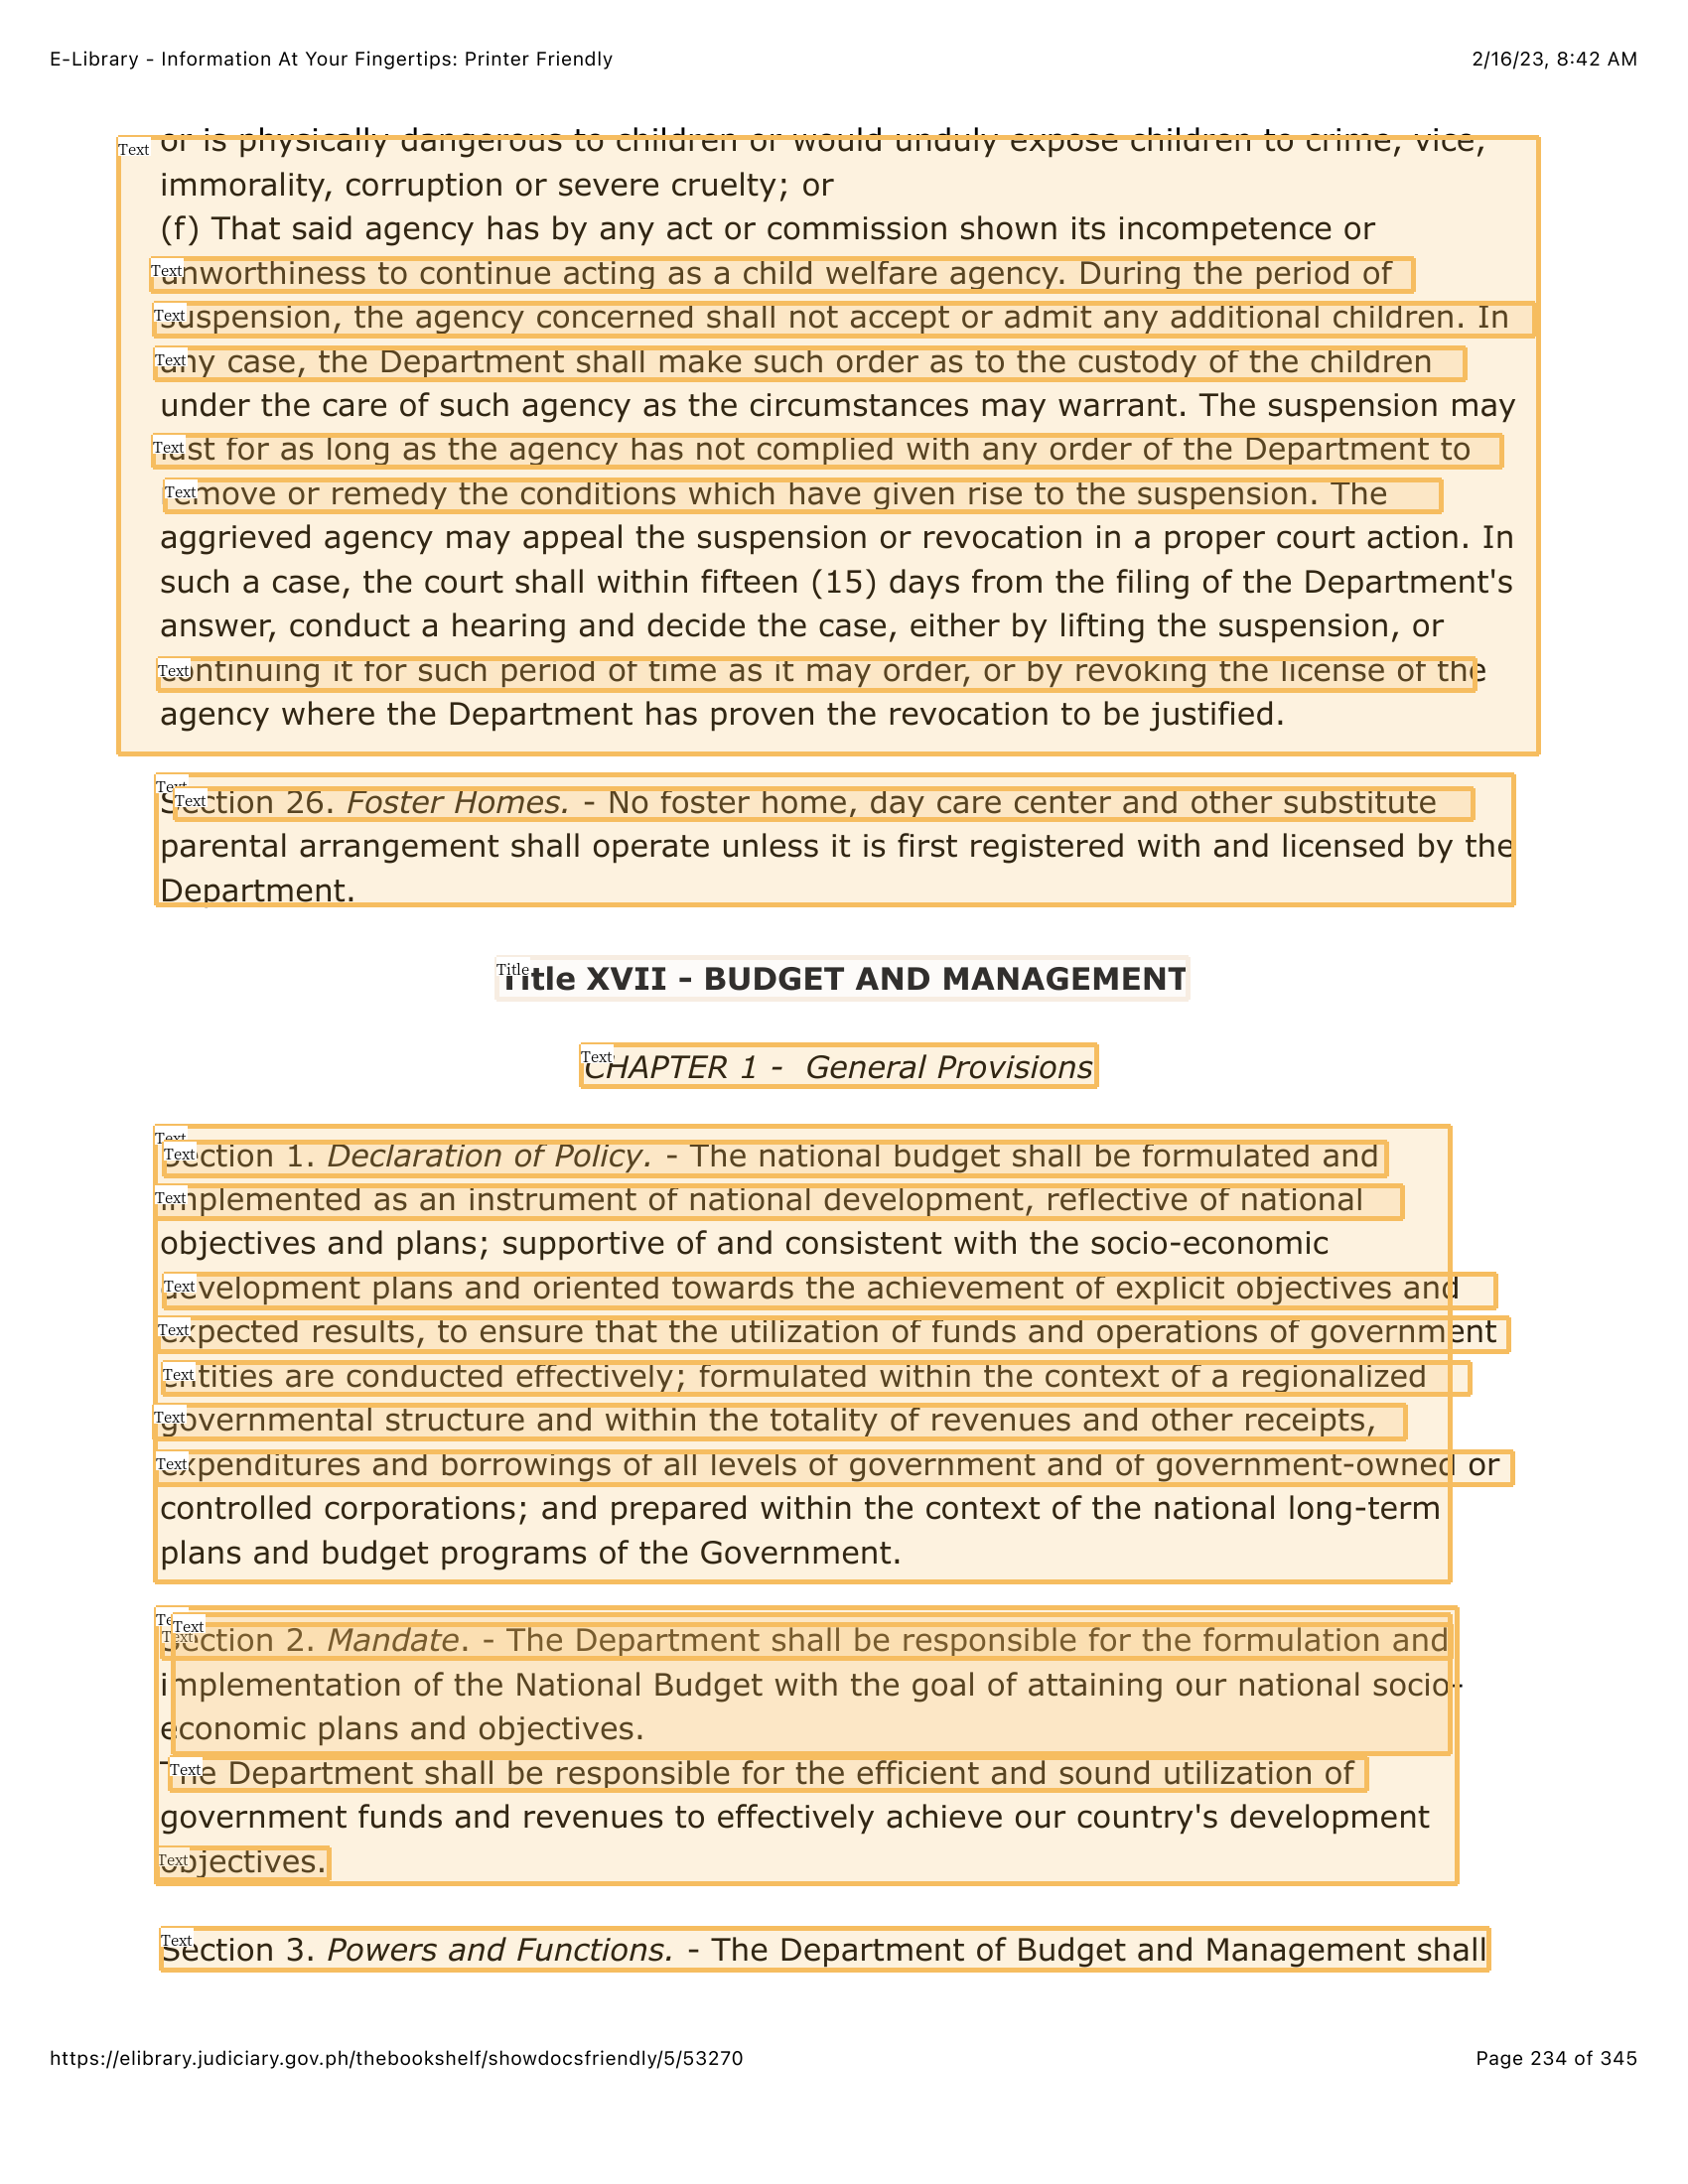

In [11]:
lp.draw_box(img_list[300], layout_results[300],  box_width=5, box_alpha=0.2, show_element_type=True)

In [12]:
texts = []
for result in layout_results:
    text = lp.Layout([b for b in result if b.type=='Text' or b.type == 'List']) 
    texts.append(text)

In [13]:
len(texts)

1217

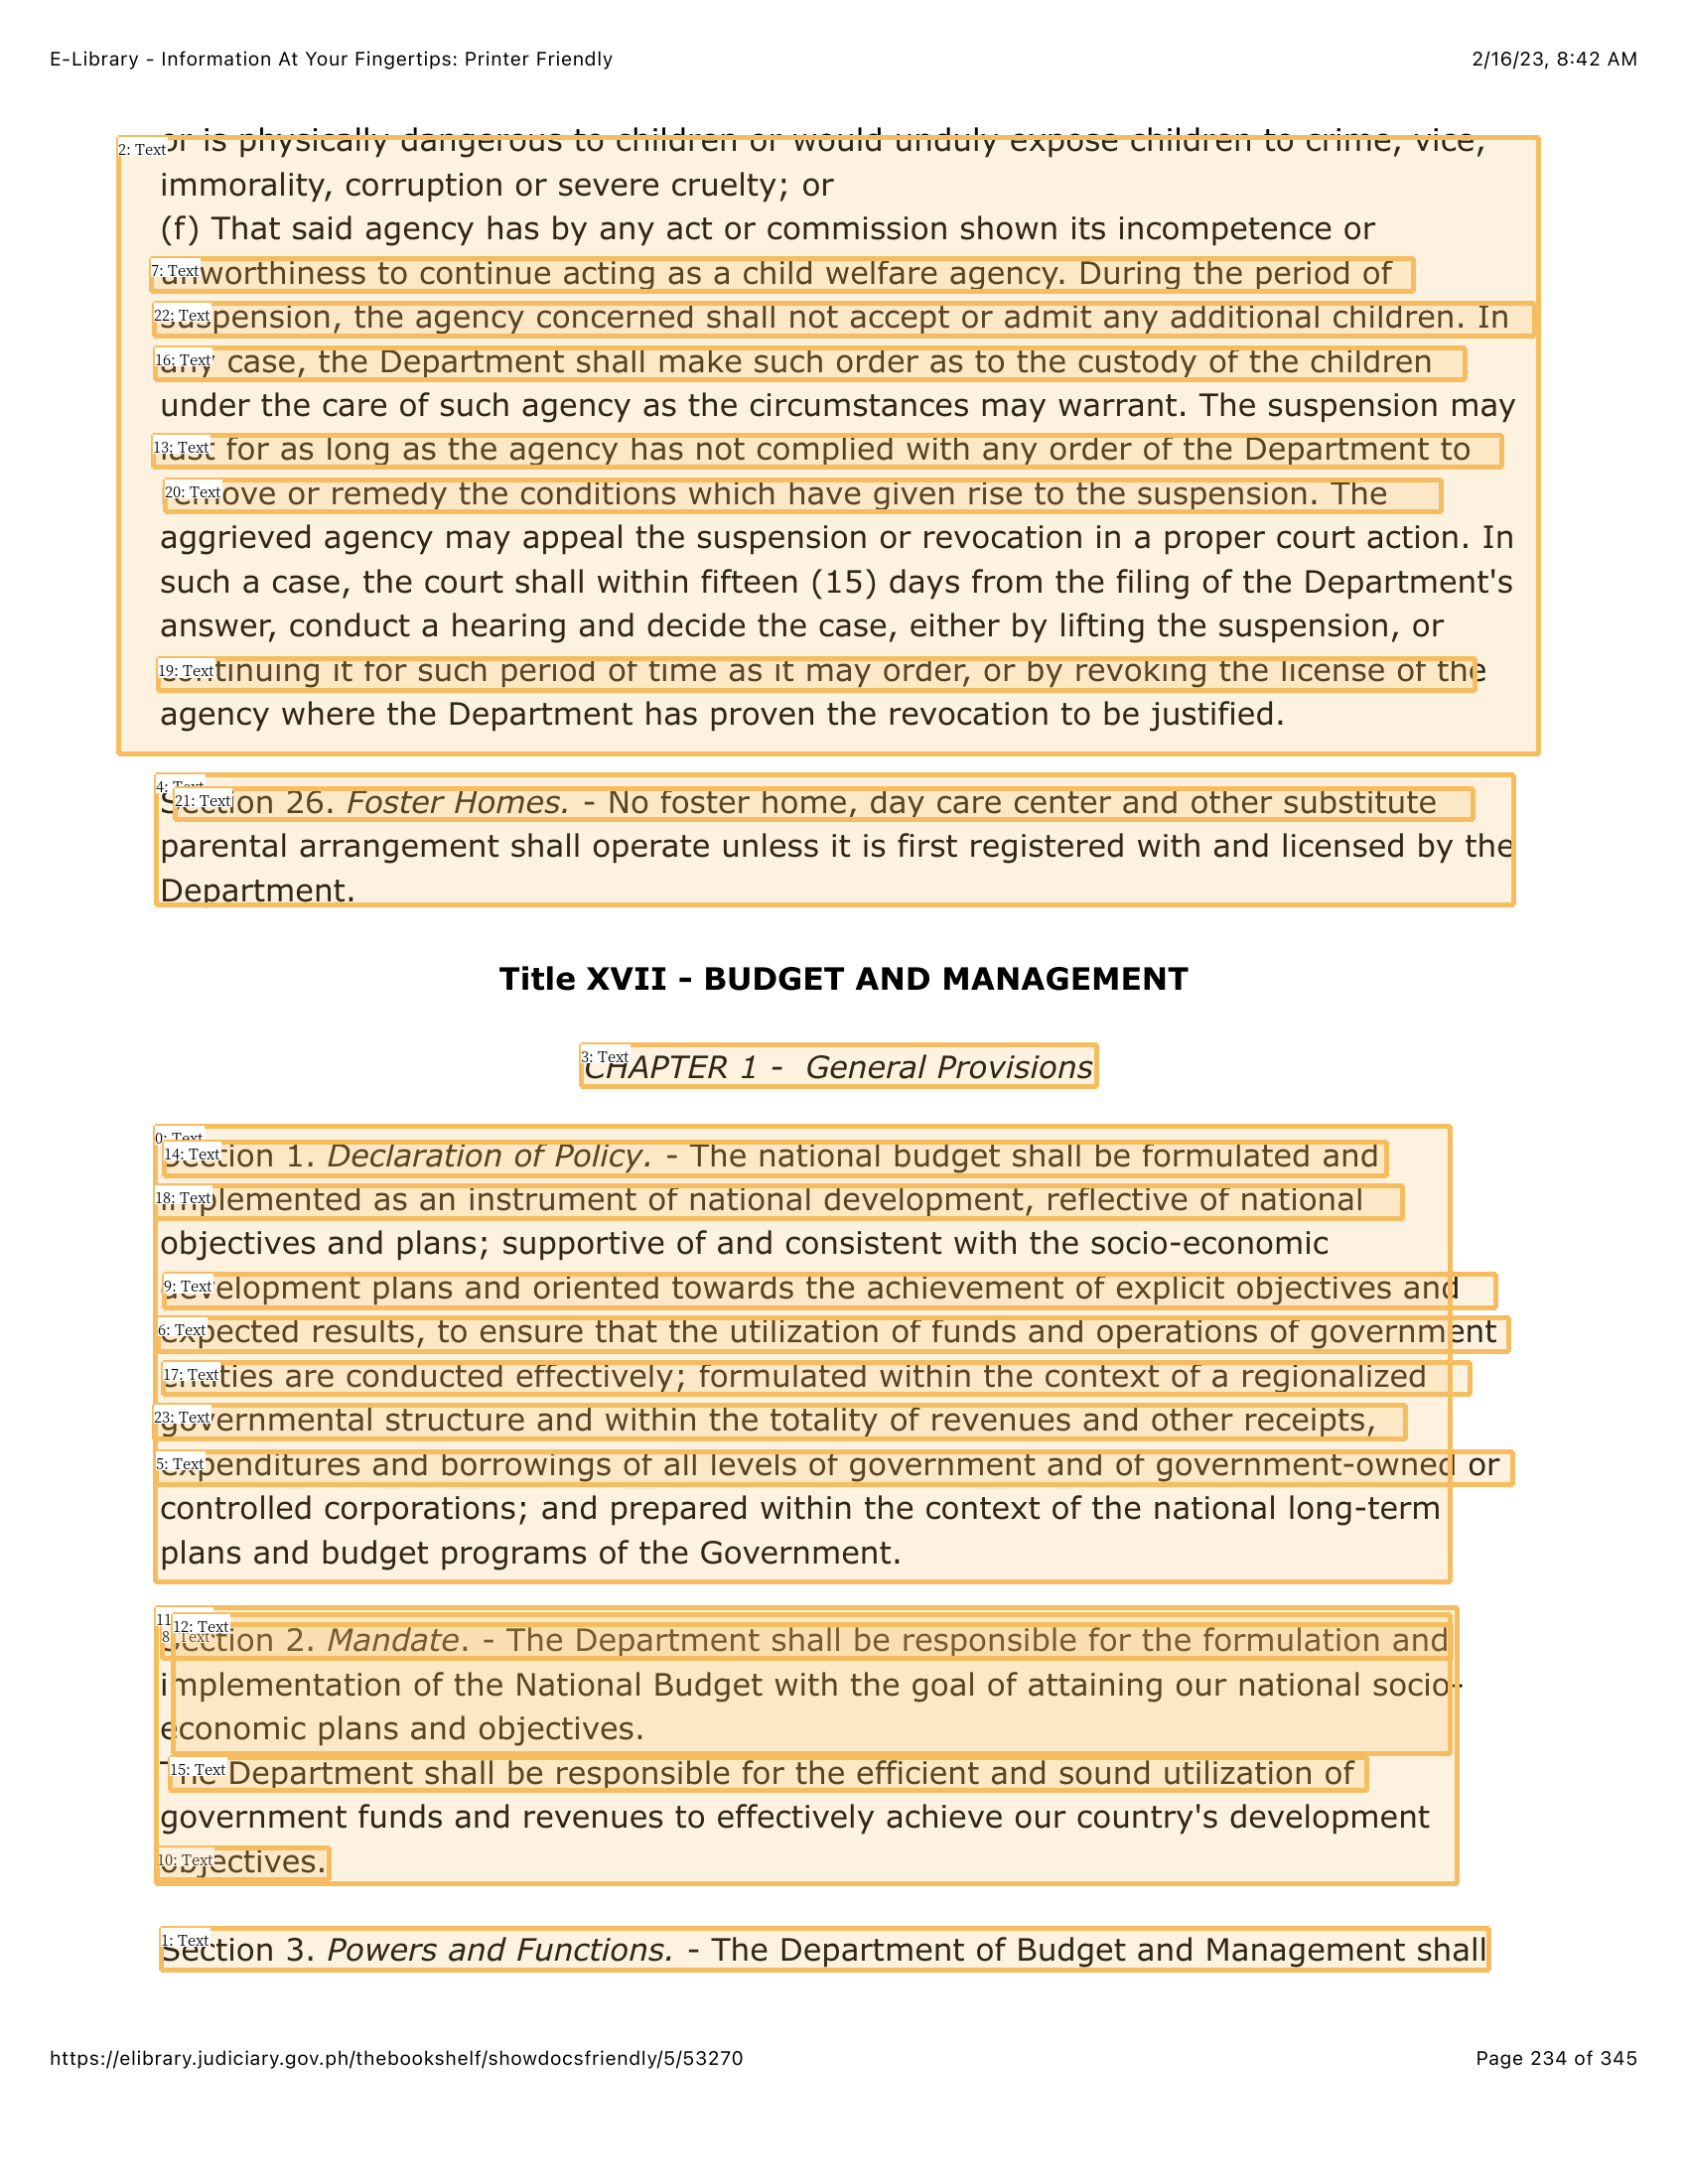

In [14]:
lp.draw_box(img_list[300], texts[300],  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)


In [15]:
img = img_list[300]

In [16]:
ocr_agent = lp.TesseractAgent(languages='eng')

AttributeError: module 'google.protobuf.internal.containers' has no attribute 'MutableMapping'

In [18]:
ocr_text = []
for item, img in zip(texts, img_list): 
    for block in item:
        # crop image around the detected layout
        segment_image = (block
                        .pad(left=15, right=15, top=5, bottom=5)
                        .crop_image(img))
        # perform OCR
        text = ocr_agent.detect(segment_image)
        # save OCR result
        block.set(text=text, inplace=True)
    ocr_text.append(item)

NameError: name 'ocr_agent' is not defined

In [288]:
len(ocr_text)

425

In [303]:
final_texts = []
for file in ocr_text:
    for text in file:
        final_texts.append(text.text)

In [308]:
final_texts[100]

'This Code distinguishes between Licensees that are subject to competitive\n'